## Explainable Techniques II
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/laxman-22/Explainable-Techniques-II/blob/main/Explainable+Techniques+II.ipynb)

This Jupyter notebook analyzes the Iris dataset in Scikit Learn in order to generate PDP, ICE, and ALE plots and explain any key insights from the plots. The Logistic Regression model is used from the Scikit Learn Library in order to create these plots.

Necessary Imports

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from alepython import ale_plot

## Exploratory Data Analysis

Download the Iris dataset which contains 4 features of flowers: sepal length, width, petal length, width and the target is the species which could be Setosa, Versicolor, or Virginica

In [2]:
data = load_iris()
X = data.data
y = data.target
print("Features: ", data.feature_names)
print("Target Variable: ", data.target_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Variable:  ['setosa' 'versicolor' 'virginica']


Next we can convert the dataset into a dataframe for easier visualization and additional processing.

We can see what the first few rows of output looks like as well.

In [3]:
columns = data.feature_names
df = pd.DataFrame(data=X, columns=columns)
df['species'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Below we can see what the distribution of the data looks like sepal length sepal width and petal width all have low standard deviations, indicating that there aren't any outliers in this dataset as the distribution of the values in those columns is close to the mean. However the distribution of the petal length feature seems to be a bit more variable and deviates from the mean more than the other features.

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Let's take a look at the correlation matrix to see which features are linearly correlated

<Axes: >

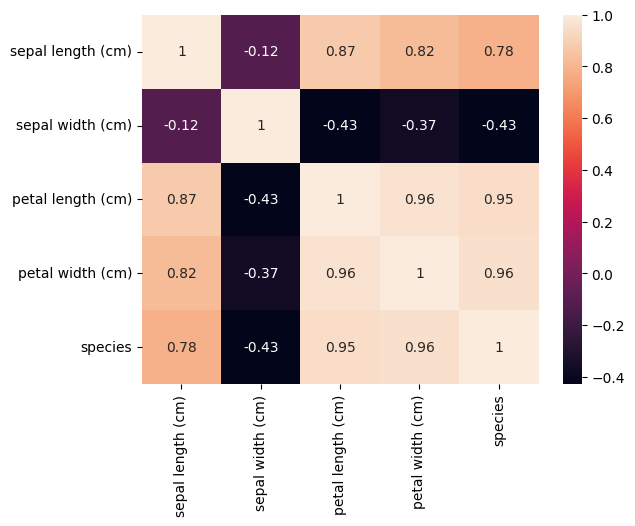

In [5]:
corr = df.corr()
sns.heatmap(corr, annot=True)

From the correlation matrix above, there are some very strong positive correlations between features, namely between petal length and petal width as well as sepal length and petal length. 

Sepal width on the other hand has much lower correlation with other features indicating lower importance of that feature.

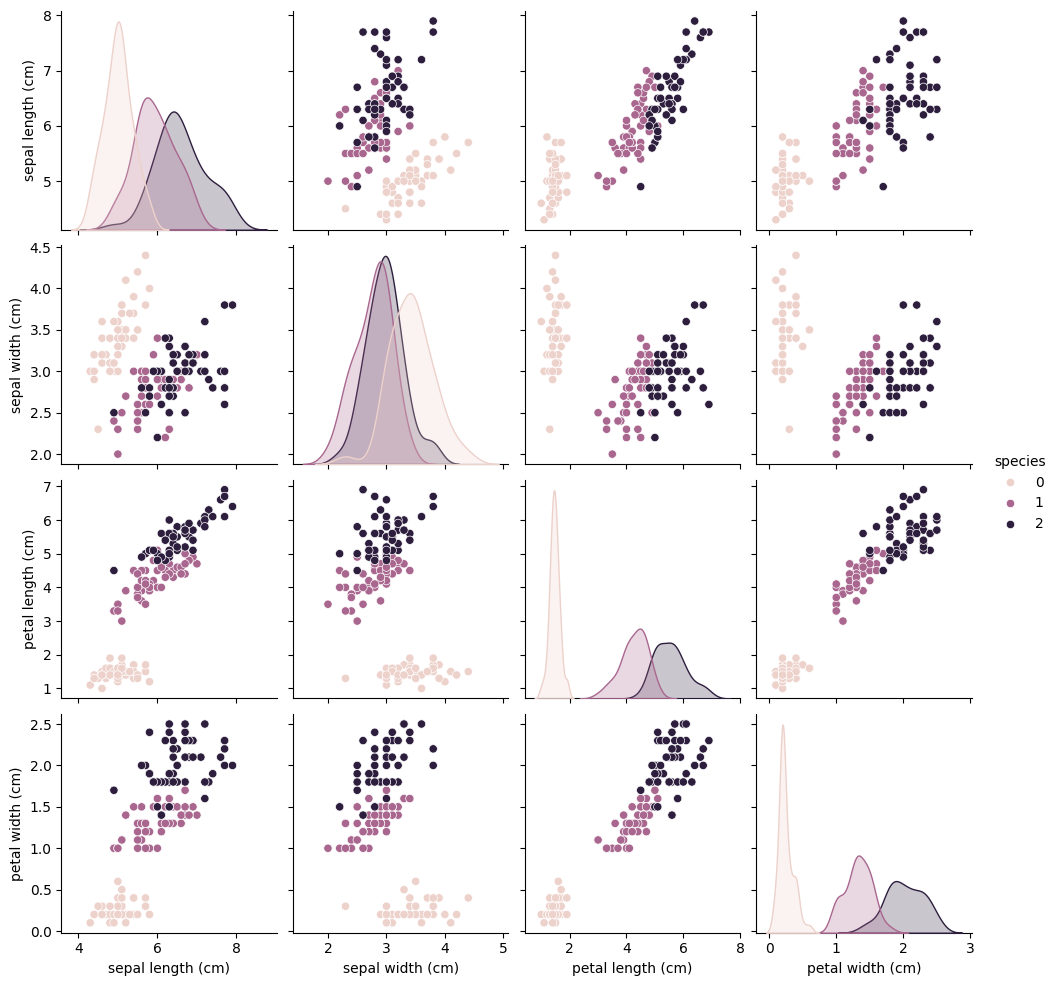

In [6]:
sns.pairplot(data=df, hue='species')

The pairplot above confirms the fact that there is in fact a strong linear relationship between petal length and petal width as well as sepal length and petal length. It is also clear through the pairplot that sepal width does not correlate linearly with any other features.

## Model Preparation

Due to the clear linear relationships we can fit a simple logistic regression model to classify the species based on the features of the flowers

In [7]:
model = LogisticRegression(max_iter=100)

X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['species'], test_size=0.2, random_state=42)

model.fit(X_train, y_train)

preds = model.predict(X_test)

print(accuracy_score(y_test, preds))

1.0


## ICE Plots

Now that the model has been fit to the dataset, we can create ICE (Individual Conditional Expectation) plots which we can use to visualize how a single feature contributed to the predictions in this model.

Because this is a multi class classification, the target variable has to be specified in order to identify how a feature contributed to each class prediction.

<Figure size 1000x800 with 0 Axes>

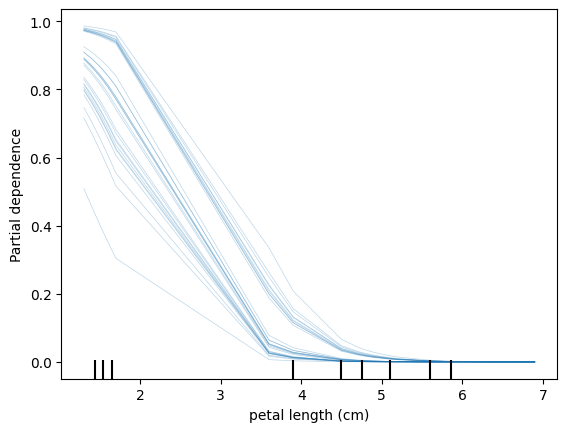

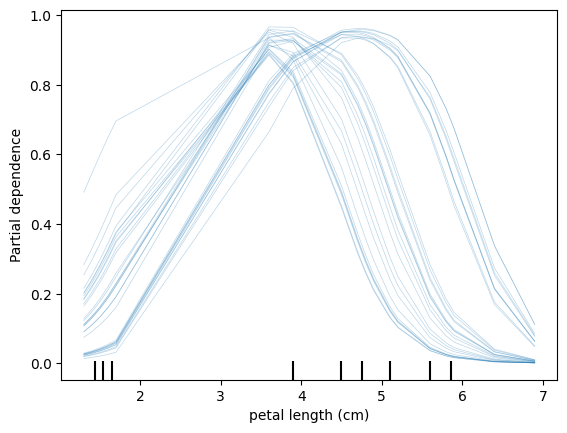

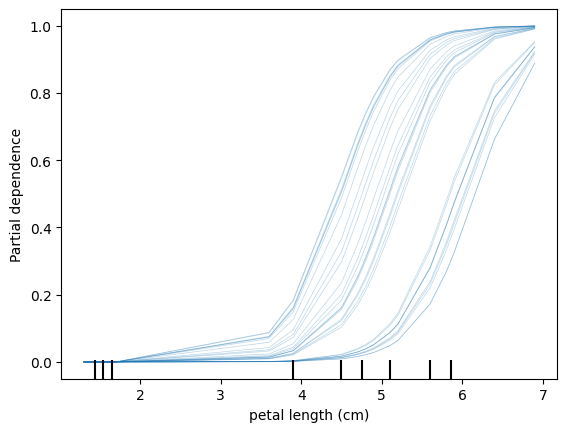

In [8]:
plt.figure(figsize=(10,8))
features = ['petal length (cm)']
PartialDependenceDisplay.from_estimator(model, X_test, features, target=0, kind='individual') 
PartialDependenceDisplay.from_estimator(model, X_test, features, target=1, kind='individual') 
PartialDependenceDisplay.from_estimator(model, X_test, features, target=2, kind='individual') 

There are some key insights that are revealed about this single feature's impact on the prediction of each target class in the model.

When the petal length is less than 4cm, the model is pretty confident (close to 1.0) from this feature alone that the flower belongs to class 0 (setosa). Similarly, as the length increases like between 4cm and 5cm, the model is pretty confident that this flower is a versicolor and when it's any larger the model is sure that the flower is a virginica. This makes sense as petal length has a very strong positive correlation with the target variable species (0.95) and the pairplot confirms what the ICE plot is demonstrating as there is a clear separation of species based on petal length and the strong linear relationship results in clear, distinct ICE plots.

This process can be repeated for the other features to see how the individual contribution of the other features impact the model's decisions.

<Figure size 1000x800 with 0 Axes>

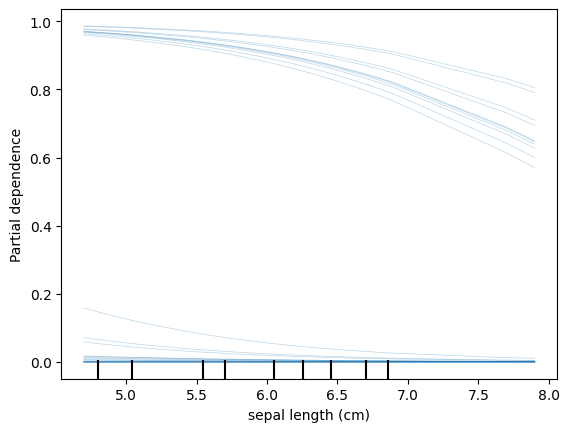

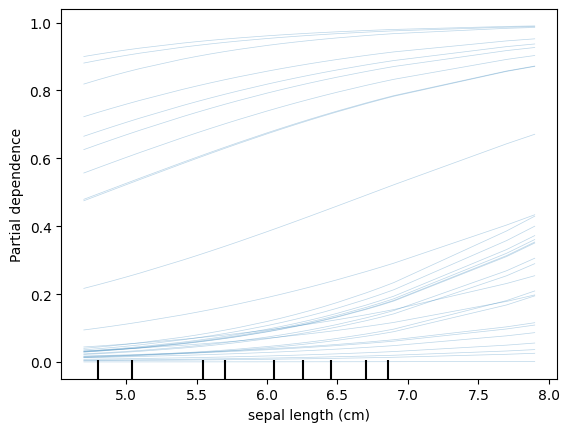

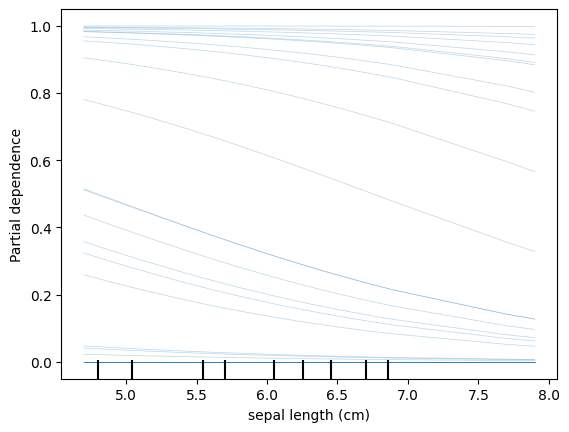

In [9]:
plt.figure(figsize=(10,8))
features = ['sepal length (cm)']
PartialDependenceDisplay.from_estimator(model, X_test, features, target=0, kind='individual') 
PartialDependenceDisplay.from_estimator(model, X_test, features, target=1, kind='individual') 
PartialDependenceDisplay.from_estimator(model, X_test, features, target=2, kind='individual') 

In the case of the sepal length feature, the ICE plots are more spread out, indicating there is overlap between sepal length and the different species which can confuse the model. This is confirmed in the pairplot as there aren't obvious boundaries that can be drawn. However, there is a strong indication in the first plot with the dark blue line at the bottom of the plot between 5cm and 8cm which shows that for the setosa class, the model is confident there is no correlation between sepal length and the species above 5cm. This makes sense because all of the setosa data points have a sepal length of less than 5cm which means if the sepal length is anything more than 5cm we can be very confident that the species is NOT setosa which makes it easy to rule out.

For the other plots in the other classes, the graphs are not showing anything strong, indicating a lot of overlap in the data points with respect to sepal length which can also be confirmed by the pairplot as there is quite a lot of overlap.

<Figure size 1000x800 with 0 Axes>

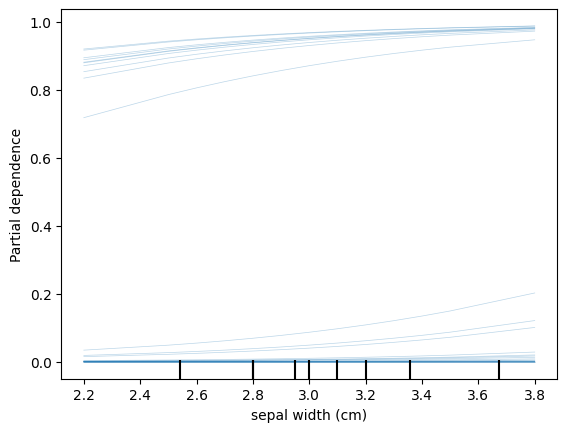

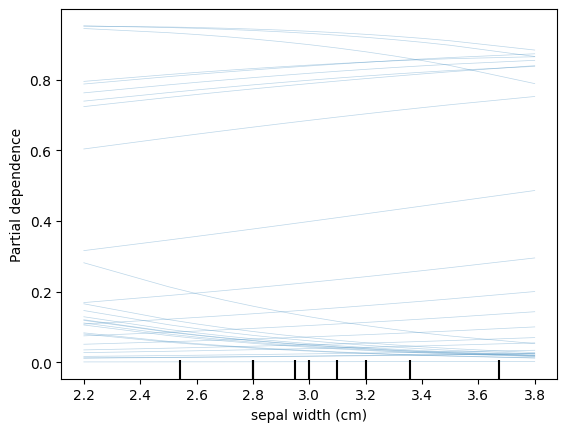

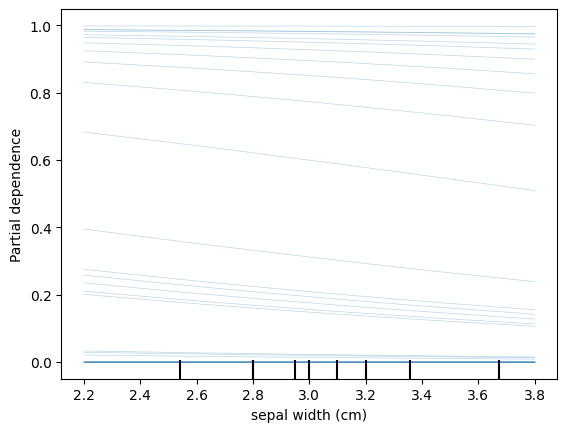

In [10]:
plt.figure(figsize=(10,8))
features = ['sepal width (cm)']
PartialDependenceDisplay.from_estimator(model, X_test, features, target=0, kind='individual') 
PartialDependenceDisplay.from_estimator(model, X_test, features, target=1, kind='individual') 
PartialDependenceDisplay.from_estimator(model, X_test, features, target=2, kind='individual') 

Once again, there is a strong indication above that if the sepal length is between 2.2 and 3.8cm, the model is confident that the species is not virginica (class 2), this is the same result for class 0 (setosa). This can also be verified in the pairplots as setosa does sit in kind of its own separated area in sepal length, the graph in the middle doesn't show any strong indications meaning there is overlap which is true from the pairplot.

<Figure size 1000x800 with 0 Axes>

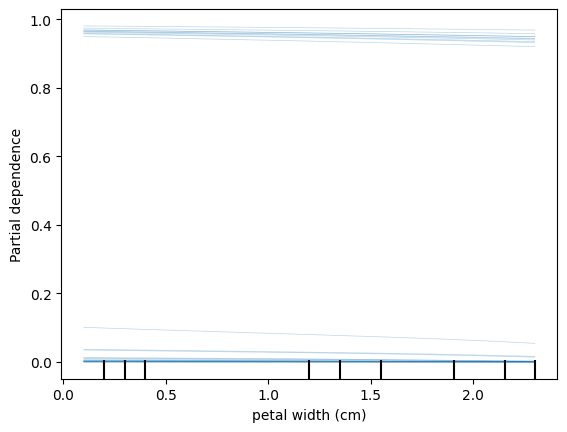

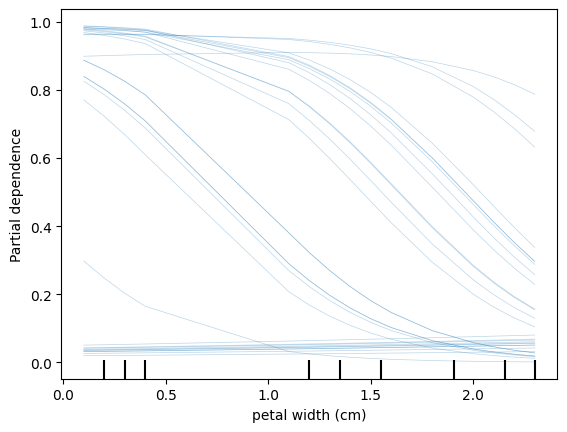

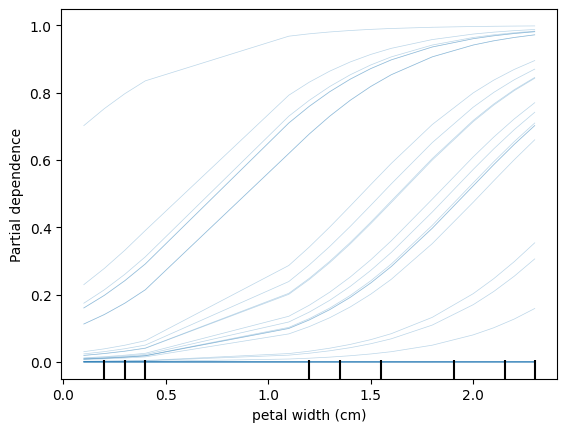

In [11]:
plt.figure(figsize=(10,8))
features = ['petal width (cm)']
PartialDependenceDisplay.from_estimator(model, X_test, features, target=0, kind='individual') 
PartialDependenceDisplay.from_estimator(model, X_test, features, target=1, kind='individual') 
PartialDependenceDisplay.from_estimator(model, X_test, features, target=2, kind='individual') 

Once again there are strong indications in the first plot that if the petal width is between 0 and 2cm, the model thinks that for the setosa species, petal width must be more than 2cm however the model seems to be a bit confused here because there are lines right at the 1 line which means some data points suggest that there is confidence that the petal width being less than 2cm is in fact setosa species (class 0) which would make sense. This is where it is important to consider how important each feature is to the model's decision making process. In this case, the accuracy is still high even though it seems like the model doesn't know what the answer is with much confidence based on this feature alone. However, the last plot shows a strong indication that if the petal width is between 0 and 2cm, it is certainly not virginica, and similarly with a slightly less sign, the middle plot shows something similar. Therefore, even though this model gets slightly confused with the first plot, the other plots show correlations that can confidently refute the observations of the first plot.

Overall ICE plots are super useful in understanding how a model made the conclusions that it did by examining each feature and the impact it has on the output of the model.

## PDP Plots

PDP (Partial Dependence Plots) are essentially the averages of the lines seen in the ICE plots above. It shows the marginal effect that features have on the models' outputs

<Figure size 800x800 with 0 Axes>

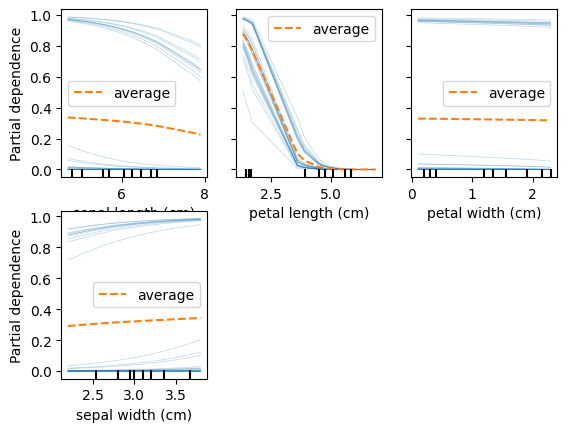

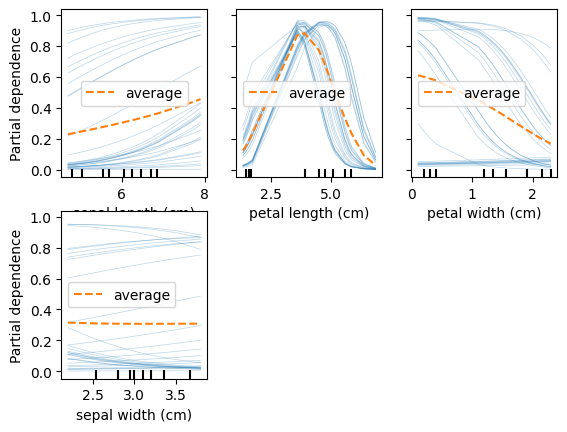

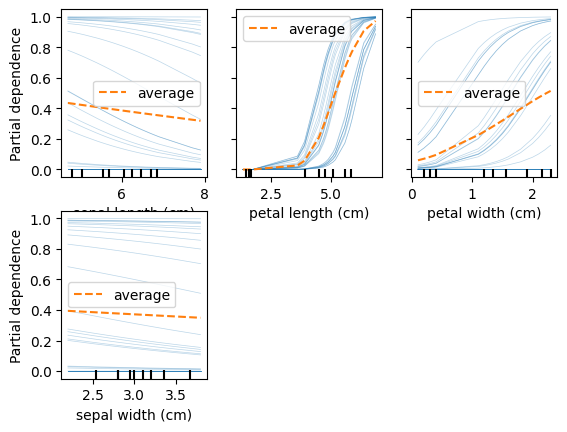

In [12]:
plt.figure(figsize=(8, 8))
features = ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)', 'sepal width (cm)']
PartialDependenceDisplay.from_estimator(model, X_test, features, target=0, kind='both') 
PartialDependenceDisplay.from_estimator(model, X_test, features, target=1, kind='both') 
PartialDependenceDisplay.from_estimator(model, X_test, features, target=2, kind='both') 

From the PDP plots above, we can see the average importance of each feature on the outputs for each class prediction. The strongest correlation is with petal length and petal width and the target variable from the clear average lines showing aggressive slopes. The other features are not as important as their slopes are not that steep and the values for them are relatively low even as the feature changes. For example, the sepal width does have a relationship with all target classes, but it's very weak as the line is not very high on the y axis, showing lack of confidence in that feature and the model's output. Furthermore, the line for sepal width is linear with a low slope in all 3 class predictions which means that even after the sepal width changes, it does not impact the output much therefore we could get away with removing that feature all together and simplify this model further.

## ALE Plots

Now we can take a look at ALE (Accumulated Local Effects) plots to see a different way that features contribute to the model's output. Below we can see a 2D second order ALE plot between petal width and petal length

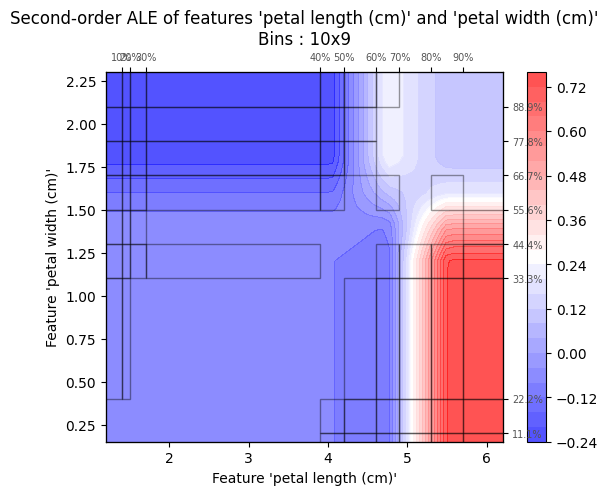

<Axes: title={'center': "Second-order ALE of features 'petal length (cm)' and 'petal width (cm)'\nBins : 10x9"}, xlabel="Feature 'petal length (cm)'", ylabel="Feature 'petal width (cm)'">

In [23]:
ale_plot(model, X_train, X_train.columns[2:], bins=10)

Based on the results of the plot above, it is clear that there is a boundary at a petal length of greater than 5cm and that indicates that there is a strong interaction between petal length and petal width in the red region which also contributes heavily to the model's outputs.

Below are individual ALE plots to show how each feature contributes to the model's output individually

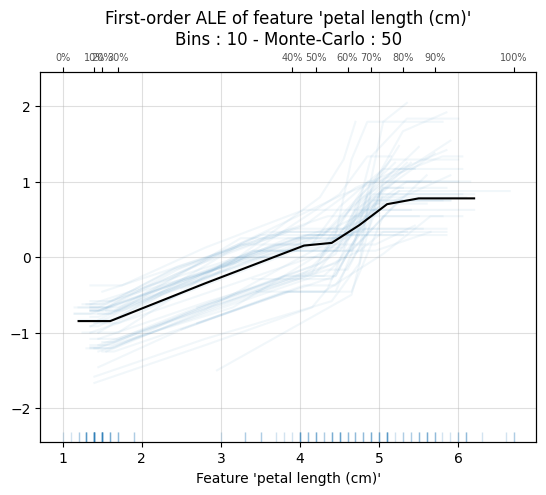

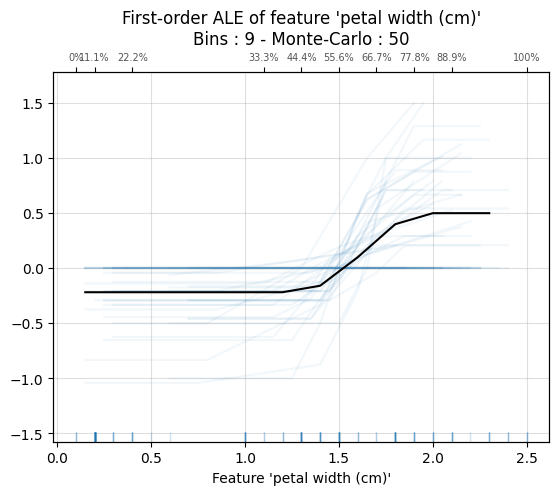

<Axes: title={'center': "First-order ALE of feature 'petal width (cm)'\nBins : 9 - Monte-Carlo : 50"}, xlabel="Feature 'petal width (cm)'">

In [24]:
ale_plot(model, X_train, 'petal length (cm)', monte_carlo=True)
ale_plot(model, X_train, 'petal width (cm)', monte_carlo=True)

These plots are very similar to the PDP plots from earlier as steeper curves show more impact on the output whereas curves that don't move much don't have significant contribution the model's predictions. Sepal width and length are the main features that don't contribute nearly as much as petal length and width. the PDP plots from before treat each feature independently and asses how that feature indpendently contributes to the output whereas the ALE plots take into consideration interactions with other features as evident on the heat map from before. 

Taking the petal width and petal length features as an example, the first plot with the heatmap shows how much the features interact with each other and the line plots show the individual contributions that the features have to the predictions. The individual contributions are similar to the PDP however, the heat map shows the interaction between the features which is critical in understanding the relationship between the features in our dataset and how the model was able to capture this relationship.

The conclusion still remains the same that both petal width and petal length are correlated and heavily contribute to the predictions in the model however the additional information of exactly how much the features interact with one another in the ALE plots provides more insight into how the model makes decisions with these features in mind.